## Importing the Modules

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random
import albumentations as A

##### Setting the SEED

In [2]:
SEED = 42

random.seed(SEED)

np.random.seed = SEED

##### Defining the path

In [3]:
IMAGE_PATH = 'data/images/'
MASK_PATH = 'data/masks/'

IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_CHANNELS = 3

In [4]:
image_files = next(os.walk(IMAGE_PATH))[2]
mask_files = next(os.walk(MASK_PATH))[2]

In [5]:
#sorting makes them easier to read sequentially since they have same naming convention(order)

image_files = sorted(image_files)
mask_files = sorted(mask_files)

In [6]:
print("IMAGE files names\n",  image_files,  "\n\n" , "MASKS files names\n", mask_files)

IMAGE files names
 ['TCGA-18-5592-01Z-00-DX1.png', 'TCGA-21-5784-01Z-00-DX1.png', 'TCGA-21-5786-01Z-00-DX1.png', 'TCGA-38-6178-01Z-00-DX1.png', 'TCGA-49-4488-01Z-00-DX1.png', 'TCGA-50-5931-01Z-00-DX1.png', 'TCGA-A7-A13E-01Z-00-DX1.png', 'TCGA-A7-A13F-01Z-00-DX1.png', 'TCGA-AR-A1AK-01Z-00-DX1.png', 'TCGA-AR-A1AS-01Z-00-DX1.png', 'TCGA-AY-A8YK-01A-01-TS1.png', 'TCGA-B0-5698-01Z-00-DX1.png', 'TCGA-B0-5710-01Z-00-DX1.png', 'TCGA-B0-5711-01Z-00-DX1.png', 'TCGA-CH-5767-01Z-00-DX1.png', 'TCGA-DK-A2I6-01A-01-TS1.png', 'TCGA-E2-A14V-01Z-00-DX1.png', 'TCGA-E2-A1B5-01Z-00-DX1.png', 'TCGA-G2-A2EK-01A-02-TSB.png', 'TCGA-G9-6336-01Z-00-DX1.png', 'TCGA-G9-6348-01Z-00-DX1.png', 'TCGA-G9-6356-01Z-00-DX1.png', 'TCGA-G9-6362-01Z-00-DX1.png', 'TCGA-G9-6363-01Z-00-DX1.png', 'TCGA-HE-7128-01Z-00-DX1.png', 'TCGA-HE-7129-01Z-00-DX1.png', 'TCGA-HE-7130-01Z-00-DX1.png', 'TCGA-KB-A93J-01A-01-TS1.png', 'TCGA-NH-A8F7-01A-01-TS1.png', 'TCGA-RD-A8N9-01A-01-TS1.png'] 

 MASKS files names
 ['TCGA-18-5592-01Z-00-DX1.pn

In [7]:
len(image_files) , len(mask_files)

(30, 30)

#### Plotting the original image ,  mask , transformed image and transformer 

In [8]:
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18
    
    if original_image is None and original_mask is None:
        f, ax = plt.subplots(1, 2, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)
        
        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)
        
        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)
        
        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)

#### Defining the Albumentations Compose Pipeline

In [9]:
aug = A.Compose([
    A.OneOf([
        A.GridDistortion(p=0.8),
        A.ElasticTransform(p=0.5, alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
    ], p=0.8),
    A.RandomRotate90(p=0.5),
    A.RandomCrop(width=224, height=224, p=0.7),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.Transpose(p=0.5)
])

In [12]:
# testing random image after augmenting

test_image = cv2.imread('data/images/TCGA-18-5592-01Z-00-DX1.png')
test_mask = cv2.imread('data/masks/TCGA-18-5592-01Z-00-DX1.png')

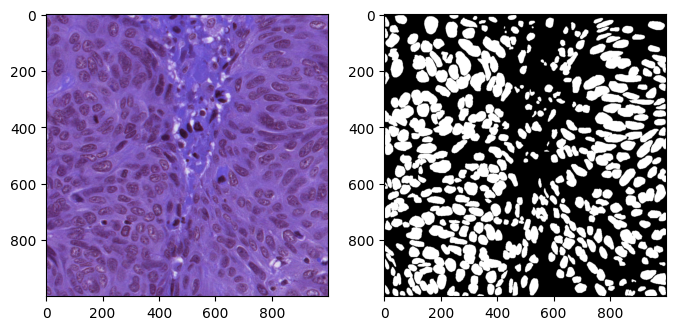

In [13]:
visualize(test_image,test_mask)

In [14]:
test = aug(image = test_image, mask = test_mask)

In [15]:
aug_test_image = test['image']
aug_test_mask = test['mask']

image_extn = mask_extn =  'png'

In [16]:
aug_test_image.shape , aug_test_mask.shape

((1000, 1000, 3), (1000, 1000, 3))

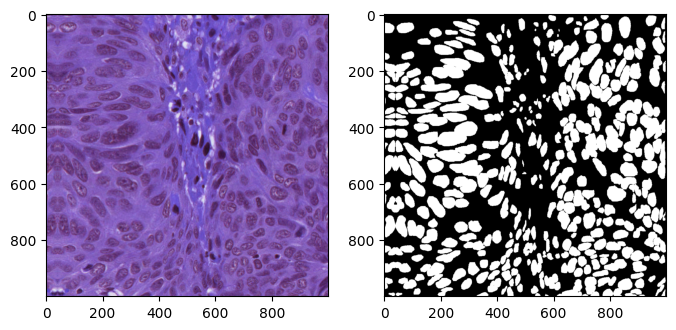

In [17]:
visualize(aug_test_image,aug_test_mask)

In [16]:
AUG_IMG_PATH = 'aug_data/aug_images/'
AUG_MASK_PATH = 'aug_daaug_masks/'

#### Augmenting the images and mask.

In [17]:
def augment_and_save(image_files, mask_files):
    
    os.makedirs(AUG_IMG_PATH, exist_ok=True)
    os.makedirs(AUG_MASK_PATH, exist_ok=True)
    
    for i in range(len(image_files)):
        
        img = cv2.imread(os.path.join(IMAGE_PATH, image_files[i]))
        mask = cv2.imread(os.path.join(MASK_PATH, mask_files[i]))
        
        for j in range(20):
            
            augmented = aug(image=img, mask=mask)
        
            aug_img = augmented['image']
            aug_mask = augmented['mask']

            aug_img = cv2.resize(aug_img, (IMG_HEIGHT, IMG_WIDTH))
            aug_mask = cv2.resize(aug_mask, (IMG_HEIGHT, IMG_WIDTH))

            base_img_name = os.path.splitext(image_files[i])[0]
            base_mask_name = os.path.splitext(mask_files[i])[0]

            # print(base_img_name) , print(base_mask_name)

            tmp_img_name = f"{base_img_name}_{j}.{image_extn}"
            tmp_mask_name = f"{base_mask_name}_{j}.{mask_extn}"

            # print(tmp_img_name) , print(tmp_mask_name)

            image_path = os.path.join(AUG_IMG_PATH, tmp_img_name)
            mask_path = os.path.join(AUG_MASK_PATH, tmp_mask_name)

            # print(image_path) , print(mask_path)

            cv2.imwrite(image_path, aug_img)
            cv2.imwrite(mask_path, aug_mask)

        


In [19]:
augment_and_save(image_files,mask_files)